In [32]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [2]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [5]:
data=pd.read_csv("Latest Covid-19 India Status.csv")

In [7]:
data.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10766,0,10637,129,0.0,98.80,1.20,100896618
1,Andhra Pradesh,2340676,0,2325943,14733,0.0,99.37,0.63,128500364
2,Arunachal Pradesh,67049,0,66753,296,0.0,99.56,0.44,658019
3,Assam,746159,5,738119,8035,0.0,98.92,1.08,290492
4,Bihar,855267,1,842952,12314,0.0,98.56,1.44,40100376


In [9]:
data.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,3.600000e+01
mean,1.249975e+06,50.333333,1.235146e+06,14778.527778,0.005000,98.897222,1.097778,3.971861e+07
std,1.846038e+06,207.118048,1.820328e+06,27221.140636,0.026673,0.506854,0.494791,5.050913e+07
min,1.076600e+04,0.000000,1.063700e+04,4.000000,0.000000,97.410000,0.030000,6.600100e+04
25%,1.065430e+05,0.000000,1.055395e+05,1124.250000,0.000000,98.690000,0.840000,1.695473e+06
50%,6.140910e+05,1.500000,6.076750e+05,6551.000000,0.000000,98.935000,1.065000,2.410088e+07
75%,1.331951e+06,9.000000,1.322329e+06,14325.750000,0.000000,99.160000,1.310000,6.979986e+07
max,8.171048e+06,1233.000000,8.022276e+06,148558.000000,0.160000,99.970000,2.440000,2.315026e+08


In [11]:
data.isnull().sum()

State/UTs          0
Total Cases        0
Active             0
Discharged         0
Deaths             0
Active Ratio       0
Discharge Ratio    0
Death Ratio        0
Population         0
dtype: int64

In [13]:
data.max()


State/UTs          West Bengal
Total Cases            8171048
Active                    1233
Discharged             8022276
Deaths                  148558
Active Ratio              0.16
Discharge Ratio          99.97
Death Ratio               2.44
Population           231502578
dtype: object

In [15]:
data.min()

State/UTs          Andaman and Nicobar
Total Cases                      10766
Active                               0
Discharged                       10637
Deaths                               4
Active Ratio                       0.0
Discharge Ratio                  97.41
Death Ratio                       0.03
Population                       66001
dtype: object

In [17]:
data.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio', 'Discharge Ratio', 'Death Ratio', 'Population'],
      dtype='object')

In [19]:
data.size

324

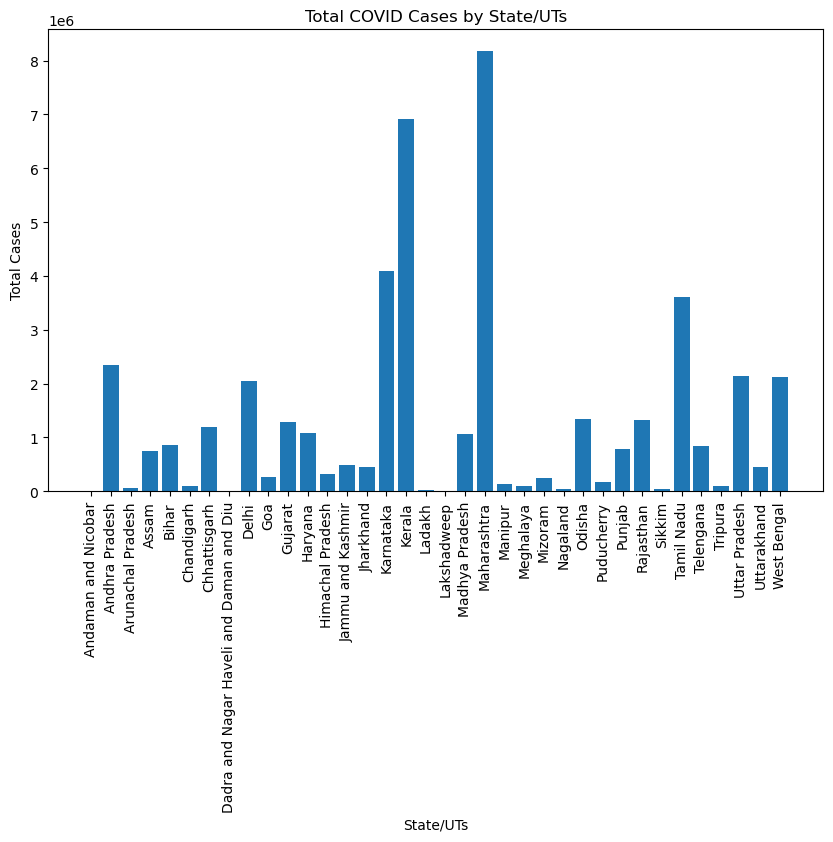

In [21]:
import matplotlib.pyplot as plt

# Assuming 'State/UTs' and 'Total Cases' are columns in your dataset
plt.figure(figsize=(10, 6))
plt.bar(data['State/UTs'], data['Total Cases'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('State/UTs')
plt.ylabel('Total Cases')
plt.title('Total COVID Cases by State/UTs')
plt.show()


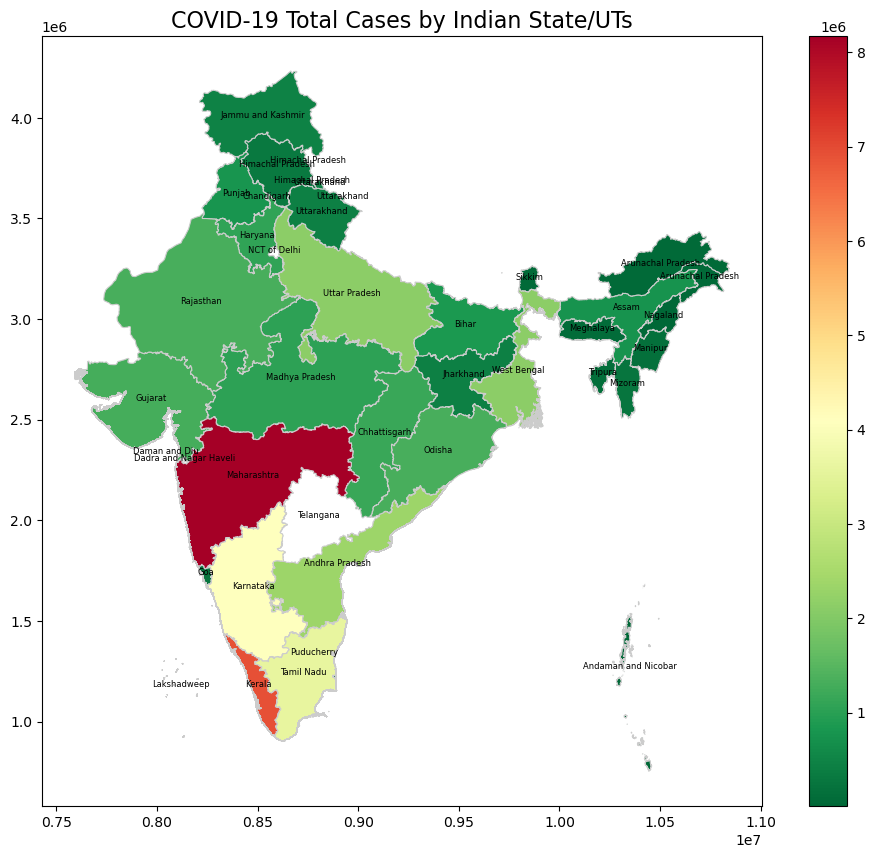

In [68]:

india_map = gpd.read_file('map/gadm41_IND_1.shp')
data['State/UTs'] = data['State/UTs'].str.strip()
india_map['NAME_1'] = india_map['NAME_1'].str.strip()

merged_data = india_map.set_index('NAME_1').join(data.set_index('State/UTs'))

merged_data = merged_data.to_crs(epsg=3857)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_data.plot(column='Total Cases', cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add state names as labels (centroids in the projected CRS)
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data.index):
    ax.text(x, y, label, fontsize=6, ha='center', color='black')

# Add plot title
plt.title('COVID-19 Total Cases by Indian State/UTs', fontsize=16)

plt.show()

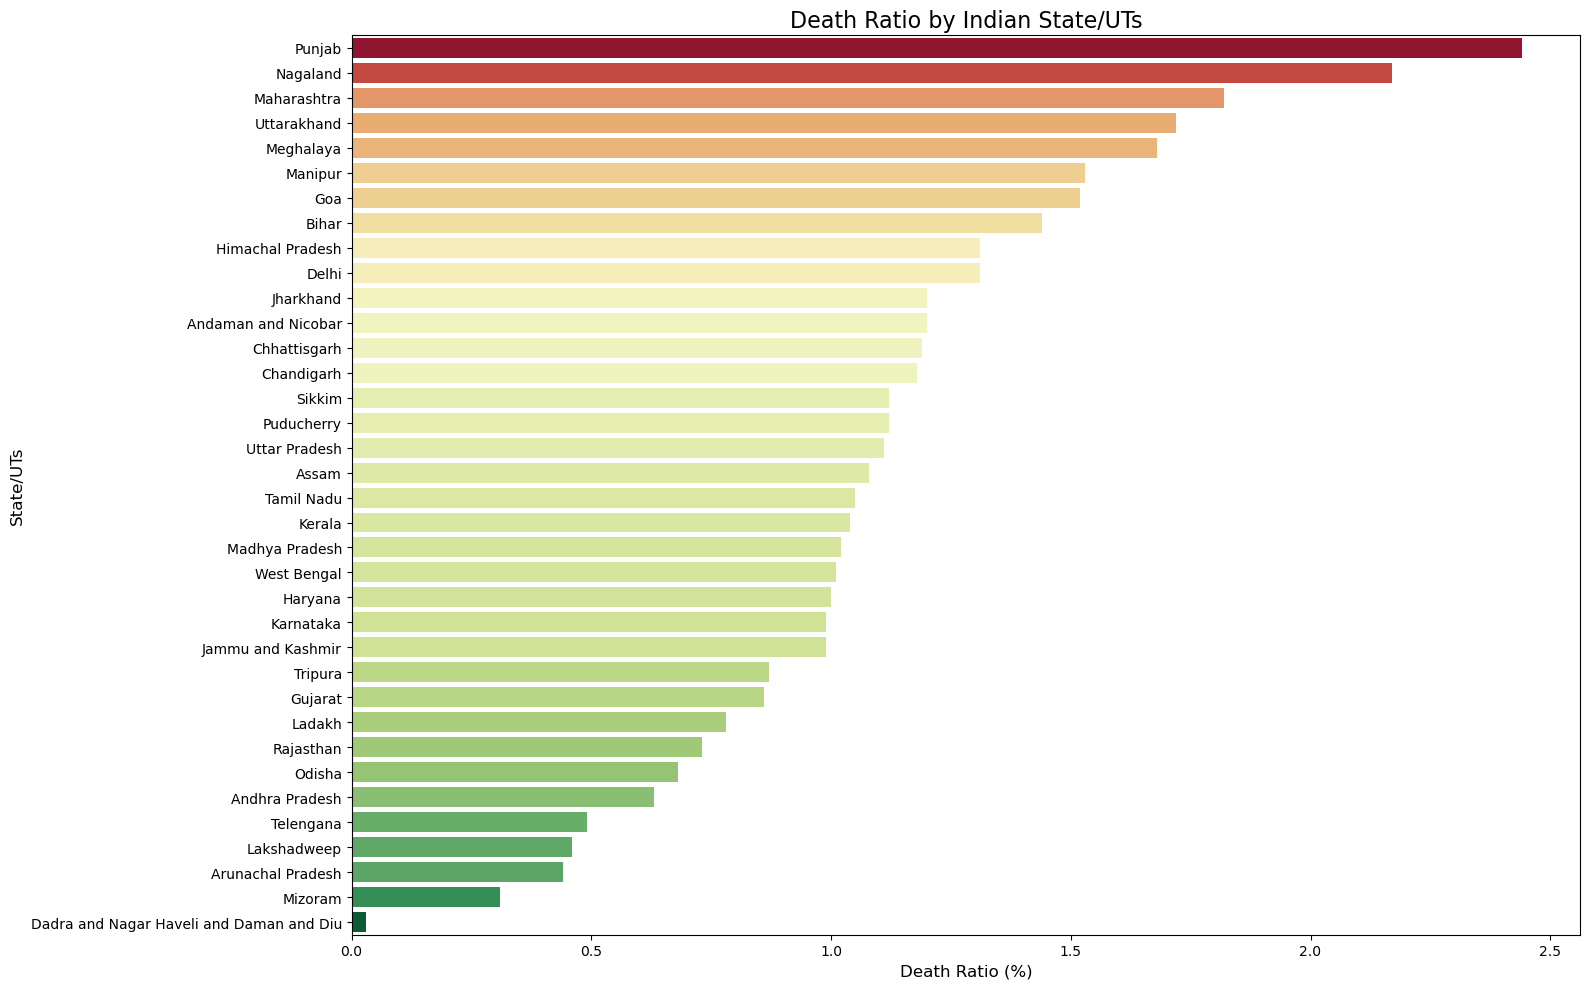

In [40]:
data_sorted = data.sort_values(by='Death Ratio', ascending=False)

plt.figure(figsize=(16, 10))

sns.barplot(x='Death Ratio', y='State/UTs', data=data_sorted, hue='Death Ratio', palette='RdYlGn_r', dodge=False, legend=False)

plt.title('Death Ratio by Indian State/UTs', fontsize=16)
plt.xlabel('Death Ratio (%)', fontsize=12)
plt.ylabel('State/UTs', fontsize=12)

plt.tight_layout()
plt.show()

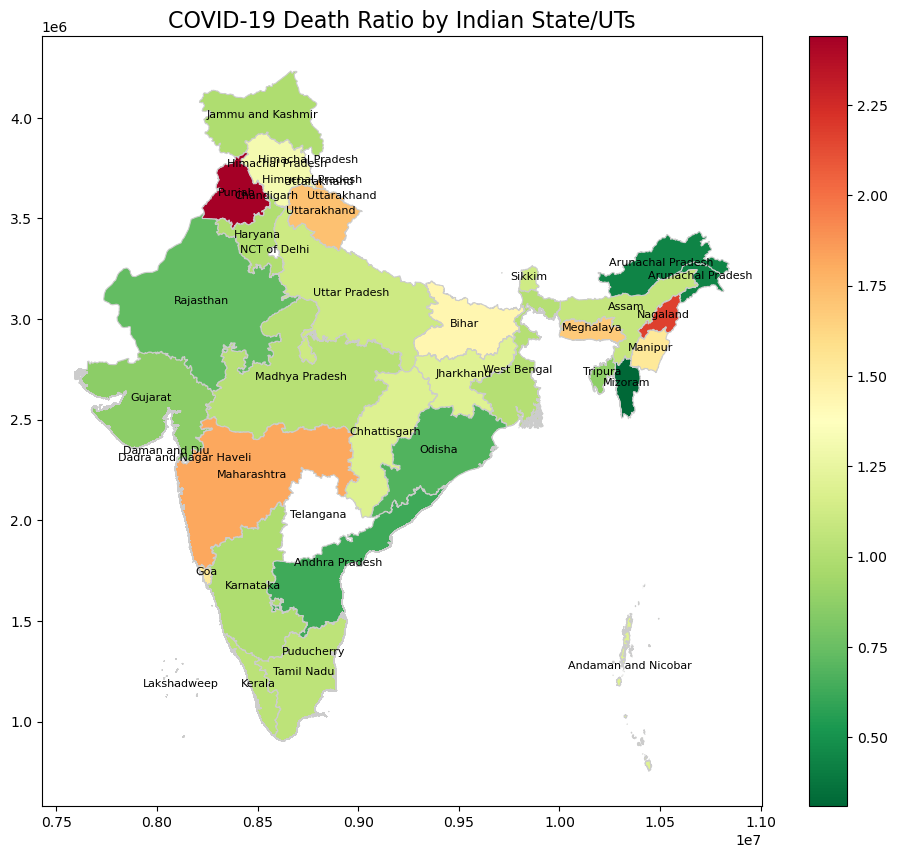

In [70]:
data['State/UTs'] = data['State/UTs'].str.strip()
india_map['NAME_1'] = india_map['NAME_1'].str.strip()

merged_data = india_map.set_index('NAME_1').join(data.set_index('State/UTs'))

merged_data = merged_data.to_crs(epsg=3857)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_data.plot(column='Death Ratio', cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data.index):
    ax.text(x, y, label, fontsize=8, ha='center', color='black')

plt.title('COVID-19 Death Ratio by Indian State/UTs', fontsize=16)

plt.show()

C:\Users\loges\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


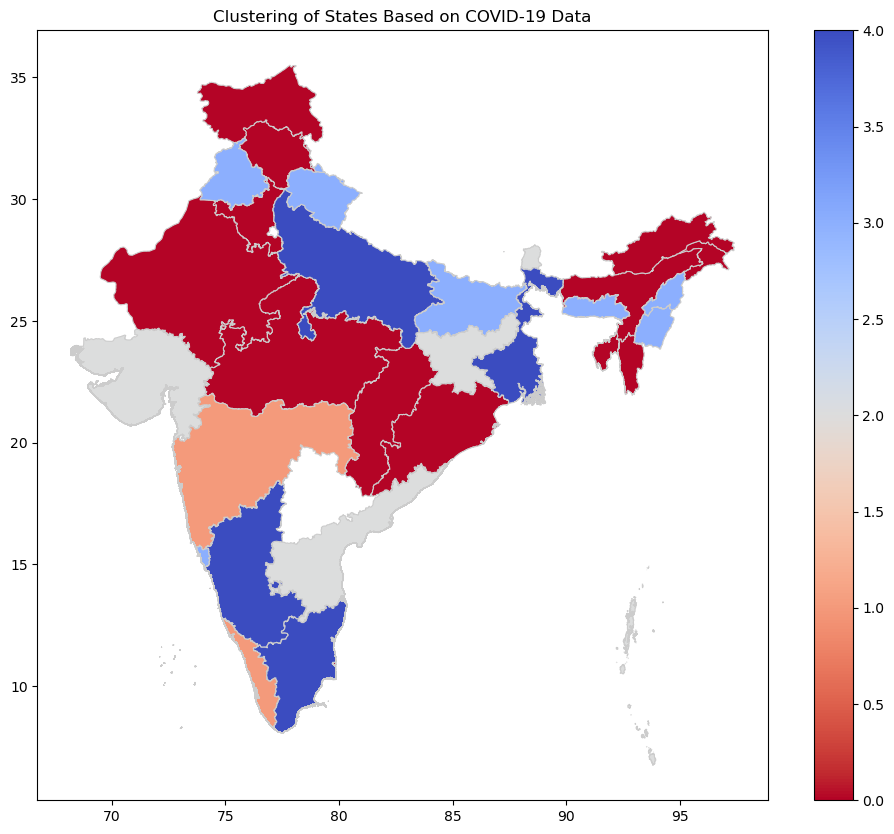

In [82]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import geopandas as gpd
  # Replace with actual shapefile path

# Step 2: Select relevant columns for clustering
features = data[['Death Ratio', 'Total Cases', 'Discharged', 'Population']]

# Step 3: Standardize the features (important for clustering algorithms)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # 3 clusters as an example
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 5: Merge the clustering result with the geographical data
merged_data = india_map.set_index('NAME_1').join(data.set_index('State/UTs'))

# Step 6: Plot the clusters on a map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_data.plot(column='Cluster', cmap='coolwarm_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Clustering of States Based on COVID-19 Data')
plt.show()


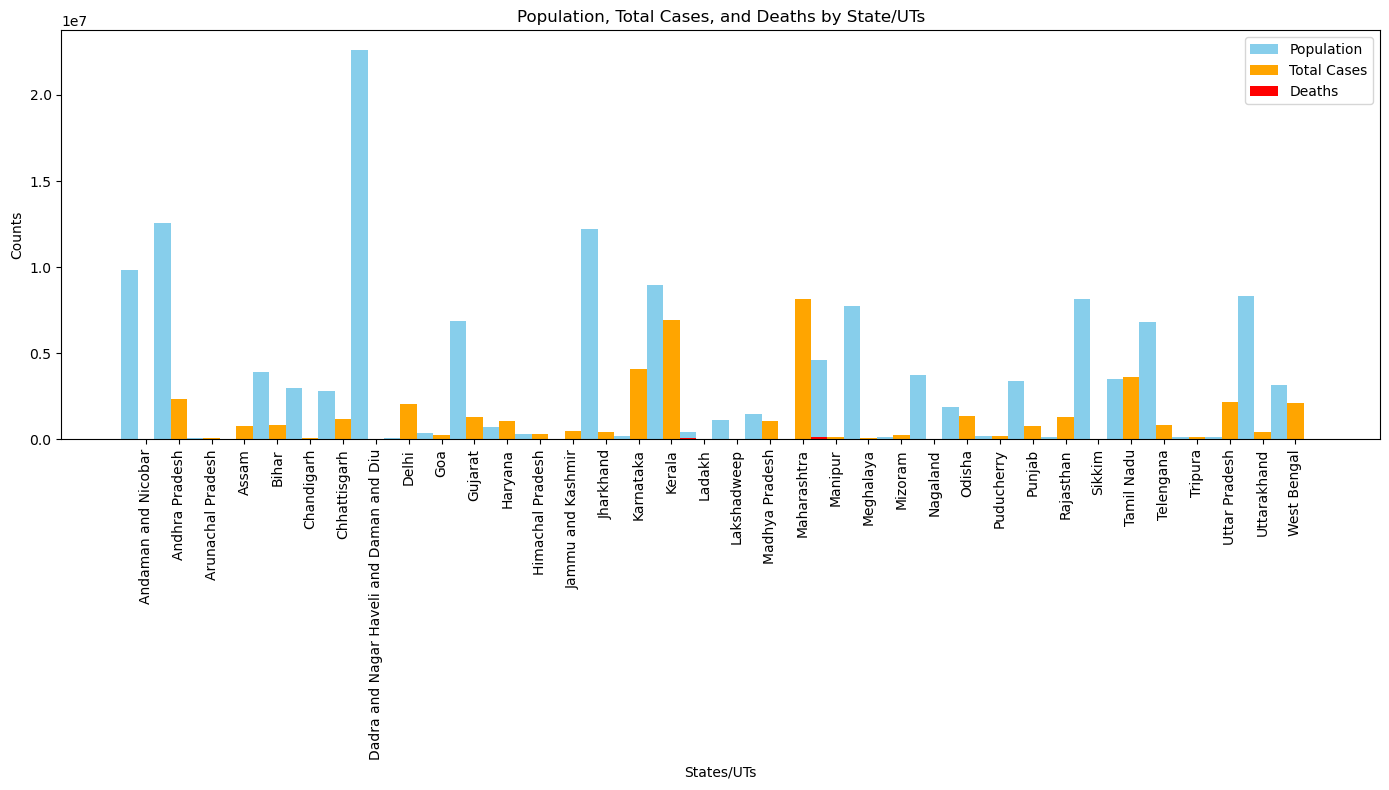

In [106]:

state_names = data['State/UTs']
population = data['Population']
population = population / (10**1.01) 
total_cases = data['Total Cases']
deaths = data['Deaths']

bar_width = 0.5
index = np.arange(len(state_names))

fig, ax = plt.subplots(figsize=(14, 8))

bar1 = ax.bar(index, population, bar_width, label='Population', color='skyblue')

bar2 = ax.bar(index + bar_width, total_cases, bar_width, label='Total Cases', color='orange')

bar3 = ax.bar(index + 2 * bar_width, deaths, bar_width, label='Deaths', color='red')

ax.set_xlabel('States/UTs')
ax.set_ylabel('Counts')
ax.set_title('Population, Total Cases, and Deaths by State/UTs')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(state_names, rotation=90)

ax.legend()

# Step 6: Display the chart
plt.tight_layout()
plt.show()